In [1]:
import sys

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import collections
import scanpy as sc
import scvi

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # to show output from all the lines in a cells
pd.set_option('display.max_column',None) # display all the columns in pandas
pd.options.display.max_rows = 100

from datetime import date
today = str(date.today())

import matplotlib
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42
sc.settings.set_figure_params(dpi = 150, color_map = 'RdPu', dpi_save = 150, vector_friendly = True, format = 'pdf')

# %cd /nfs/team205/vk8/processed_data/muscle/data_v3

results = './write/'

Global seed set to 0
/home/LiuTL/anaconda3/envs/scanpy/lib/python3.8/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/home/LiuTL/anaconda3/envs/scanpy/lib/python3.8/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
general_mrkrs = [ 'MYH7', 'TNNT1', 'TNNT3', 'MYH1', 'MYH2', "CKM", "MB", # Myofibers
           'PAX7', 'DLK1', # MuSCs
           'PDGFRA', 'DCN', 'ANGPTL7', 'OSR2', 'NGFR', 'SLC22A3','ITGA6', # Fibroblasts
           'FMOD', 'TNMD' ,  'MKX', # Tenocytes
 'MPZ', 'MBP',  # Schwann cells
'CDH2', 'L1CAM', # SCG
'MSLN', 'ITLN1', # mesothelium
"ADIPOQ", "PLIN1", # adipocytes
'PTPRC', 'CD3D', 'IL7R', # T cells
'NKG7', 'PRF1', #NK cells
'CD79A', "TCL1A",  # B cells
'MZB1', 'JCHAIN', # B plasma 
"CD14", "FCGR3A",'S100A8', 'S100A12', # Mono
"CD163", "C1QA", # Macrop
"XCR1", "CLEC9A", # cDC1 "CADM1",
"CD1C", "CLEC10A", "CCR7", # cDC2
'LILRA4', 'IL3RA', "IRF7",  # pDC 
'FCGR3B', 'CSF3R', 'SORL1',  # Neutrophils
'EPX', 'PRG2', # Eosinophils 'CLC'
'TPSB2', 'MS4A2', # Mast cells
'PECAM1', 'HEY1','CLU', # art EC
'CA4', 'LPL', # capEC
'ACKR1', 'SELE', # venEC
'LYVE1', 'TFF3',  # lymphEC
'RGS5','ABCC9', # pericytes           
'MYH11', 'ACTA2', # SMC
'HBA1', #RBC
    ]

In [3]:
adata_sc = sc.read(f'{results}/ICM_scell_dbrm_scvi_v2_2023-03-06.h5ad')

In [3]:
adata_scvi_NKT = sc.read('./write/ICM_result/NKT_cells_scvi/adata.h5ad')
adata_scvi_B = sc.read('./write/human_SKM_v2.0_Bcell_scVI_adata.h5ad')
adata_scvi_Myeloid = sc.read('./write/ICM_result/Myeloid_cells_scvi/adata.h5ad')
adata_scvi_Mast = sc.read('./write/human_SKM_v2.0_Mast_scVI_adata.h5ad')
adata_scvi_Neutrophil = sc.read('./write/human_SKM_v2.0_Neutrophil_scVI_adata.h5ad')
adata_scvi_pDC = sc.read('./write/human_SKM_v2.0_pDC_scVI_adata.h5ad')

In [5]:
adata_NKT_clean = adata_sc[adata_scvi_NKT.obs.index]
adata_B_clean = adata_sc[adata_scvi_B.obs.index]
adata_Myeloid_clean = adata_sc[adata_scvi_Myeloid.obs.index]
adata_Mast_clean = adata_sc[adata_scvi_Mast.obs.index]
adata_Neutrophil_clean = adata_sc[adata_scvi_Neutrophil.obs.index]
adata_pDC_clean = adata_sc[adata_scvi_pDC.obs.index]

In [6]:
adata = adata_NKT_clean.concatenate(adata_B_clean,adata_Myeloid_clean,adata_Mast_clean,adata_Neutrophil_clean,adata_pDC_clean)

/home/LiuTL/anaconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [7]:
adata

AnnData object with n_obs × n_vars = 20321 × 33538
    obs: 'SampleID', 'barcode', 'concat_sample_no', 'DonorID', 'Sex', 'Age', 'Species', 'Operator', 'Sample', '10X_version', 'n_counts', 'n_counts_raw', 'percent_soup', 'n_counts_spliced', 'n_counts_unspliced', 'percent_spliced', 'n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'Age_group', 'scrublet_score', 'scrublet_cluster_score', 'bh_pval', 'is_doublet', 'S_score', 'G2M_score', 'phase', 'is_doublet_scrub', 'annotation_level0', 'annotation_level1', 'annotation_level2', 'sample_type', 'update_status', 'putative_doublet_scvi1', '_scvi_batch', '_scvi_labels', 'leiden', 'coarse_predicted_labels', 'coarse_over_clustering', 'coarse_majority_voting', 'coarse_conf_score', 'fine_predicted_labels', 'fine_over_clustering', 'fine_majority_voting', 'fine_conf_score', 'fine2_predicted_labels', 'fine2_over_clustering', 'fine2_majority_voting', 'fine2_conf_score', 'batch'
    var: 'ENSEMBL', 'SYMBOL', 'n_counts', 'n_cells', 'mean', 'std'
  

In [8]:
adata.write('./write/ICM_Immune_cell_scvi_adata_raw_test.h5ad')

In [10]:
adata.layers['counts'] = adata.X.copy()
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata  # keep full dimension safe

In [11]:
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=10000, layer="counts",batch_key='Age_group', subset = True)

scvi.model.SCVI.setup_anndata(adata, layer="counts", batch_key='SampleID',
                              categorical_covariate_keys=["DonorID", "Sex", "10X_version"],
                              continuous_covariate_keys=['percent_mito'])

vae = scvi.model.SCVI(adata,n_hidden=128, n_latent=30, n_layers=2)
vae.train()
adata.obsm["X_scVI"] = vae.get_latent_representation()
sc.pp.neighbors(adata, use_rep="X_scVI")
sc.tl.leiden(adata)
sc.tl.umap(adata)

/home/LiuTL/anaconda3/envs/scanpy/lib/python3.8/site-packages/scvi/model/base/_training_mixin.py:67: UserWarning: max_epochs=394 is less than n_epochs_kl_warmup=400. The max_kl_weight will not be reached during training.
  warnings.warn(
/usr/bin/nvidia-modprobe: unrecognized option: "-s"

ERROR: Invalid commandline, please run `/usr/bin/nvidia-modprobe --help`
       for usage information.

/usr/bin/nvidia-modprobe: unrecognized option: "-s"

ERROR: Invalid commandline, please run `/usr/bin/nvidia-modprobe --help`
       for usage information.

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 394/394: 100%|██████████| 394/394 [18:31<00:00,  3.55s/it, loss=1.29e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=394` reached.


Epoch 394/394: 100%|██████████| 394/394 [18:31<00:00,  2.82s/it, loss=1.29e+03, v_num=1]


In [19]:
adata

AnnData object with n_obs × n_vars = 20321 × 10000
    obs: 'SampleID', 'barcode', 'concat_sample_no', 'DonorID', 'Sex', 'Age', 'Species', 'Operator', 'Sample', '10X_version', 'n_counts', 'n_counts_raw', 'percent_soup', 'n_counts_spliced', 'n_counts_unspliced', 'percent_spliced', 'n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'Age_group', 'scrublet_score', 'scrublet_cluster_score', 'bh_pval', 'is_doublet', 'S_score', 'G2M_score', 'phase', 'is_doublet_scrub', 'annotation_level0', 'annotation_level1', 'annotation_level2', 'sample_type', 'update_status', 'putative_doublet_scvi1', '_scvi_batch', '_scvi_labels', 'leiden', 'coarse_predicted_labels', 'coarse_over_clustering', 'coarse_majority_voting', 'coarse_conf_score', 'fine_predicted_labels', 'fine_over_clustering', 'fine_majority_voting', 'fine_conf_score', 'fine2_predicted_labels', 'fine2_over_clustering', 'fine2_majority_voting', 'fine2_conf_score', 'batch'
    var: 'ENSEMBL', 'SYMBOL', 'n_counts', 'n_cells', 'mean', 'std', '

In [45]:
adata.write('./write/ICM_Immune_cell_scvi_adata_v3.h5ad')

In [4]:
adata = sc.read('./write/ICM_Immune_cell_scvi_adata_v3.h5ad')

In [7]:
adata

AnnData object with n_obs × n_vars = 20321 × 10000
    obs: 'SampleID', 'barcode', 'concat_sample_no', 'DonorID', 'Sex', 'Age', 'Species', 'Operator', 'Sample', '10X_version', 'n_counts', 'n_counts_raw', 'percent_soup', 'n_counts_spliced', 'n_counts_unspliced', 'percent_spliced', 'n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'Age_group', 'scrublet_score', 'scrublet_cluster_score', 'bh_pval', 'is_doublet', 'S_score', 'G2M_score', 'phase', 'is_doublet_scrub', 'annotation_level0', 'annotation_level1', 'annotation_level2', 'sample_type', 'update_status', 'putative_doublet_scvi1', '_scvi_batch', '_scvi_labels', 'leiden', 'coarse_predicted_labels', 'coarse_over_clustering', 'coarse_majority_voting', 'coarse_conf_score', 'fine_predicted_labels', 'fine_over_clustering', 'fine_majority_voting', 'fine_conf_score', 'fine2_predicted_labels', 'fine2_over_clustering', 'fine2_majority_voting', 'fine2_conf_score', 'batch', 'annotation_fin'
    var: 'ENSEMBL', 'SYMBOL', 'n_counts', 'n_cells'

/home/LiuTL/anaconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


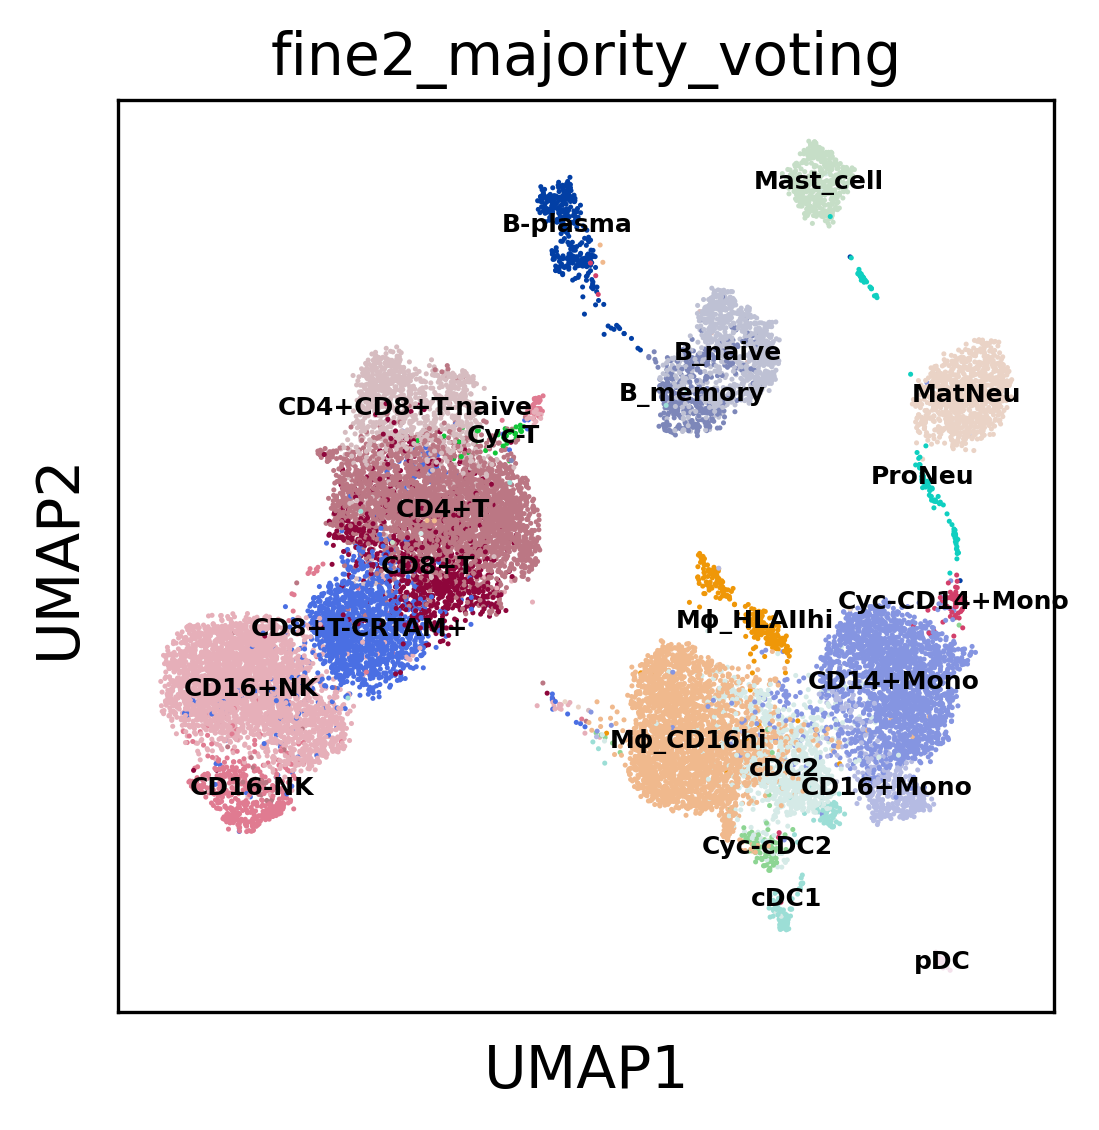

In [5]:
sc.pl.umap(adata, color = ['fine2_majority_voting',],legend_loc='on data',legend_fontsize=6 )

/home/LiuTL/anaconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


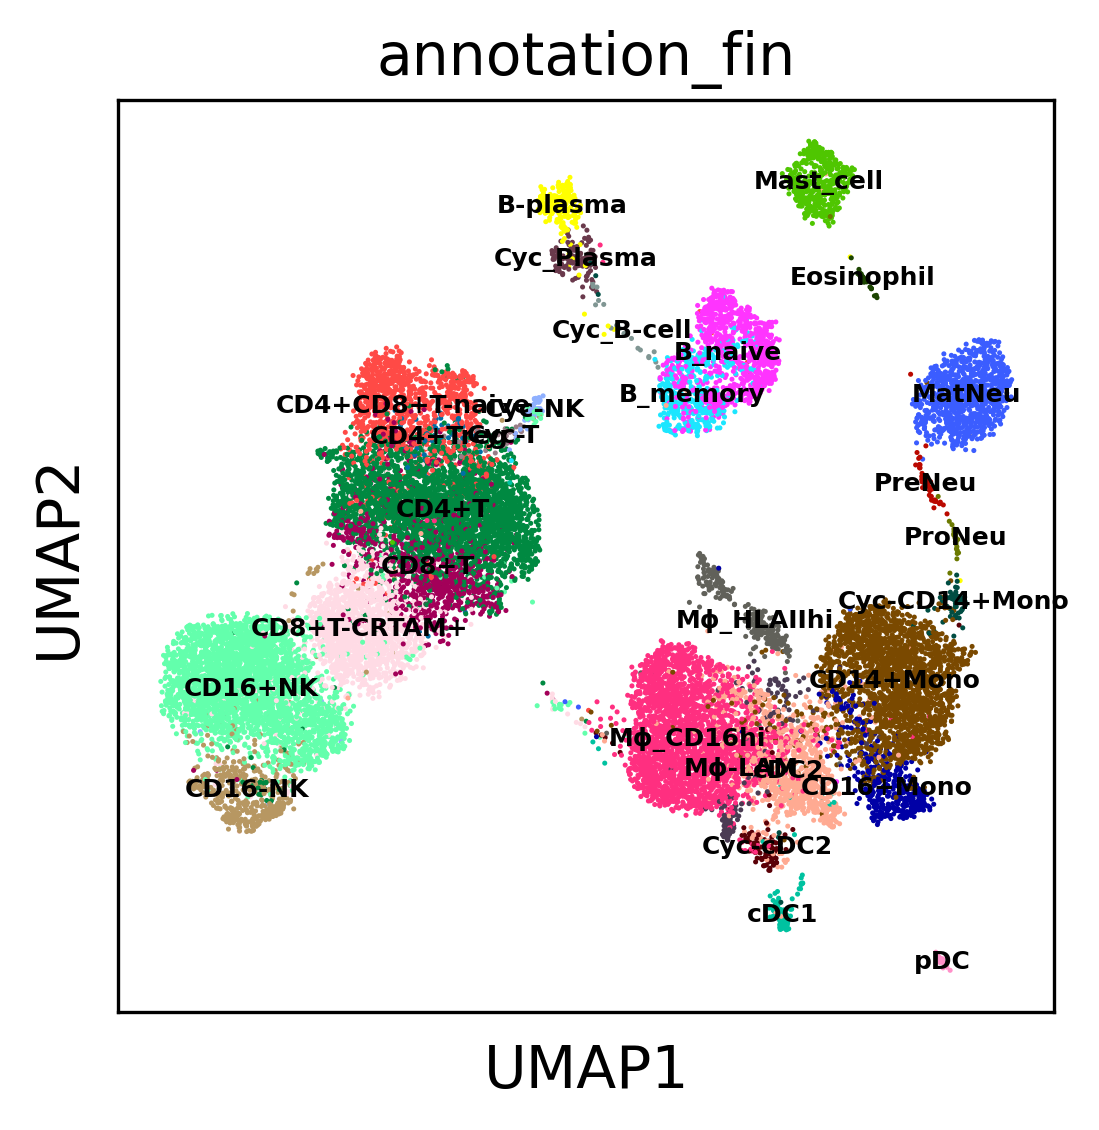

In [37]:
sc.pl.umap(adata, color = ['annotation_fin',],legend_loc='on data',legend_fontsize=6,save='ICM_Immune_cell_scvi_anno.pdf')

/home/LiuTL/anaconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


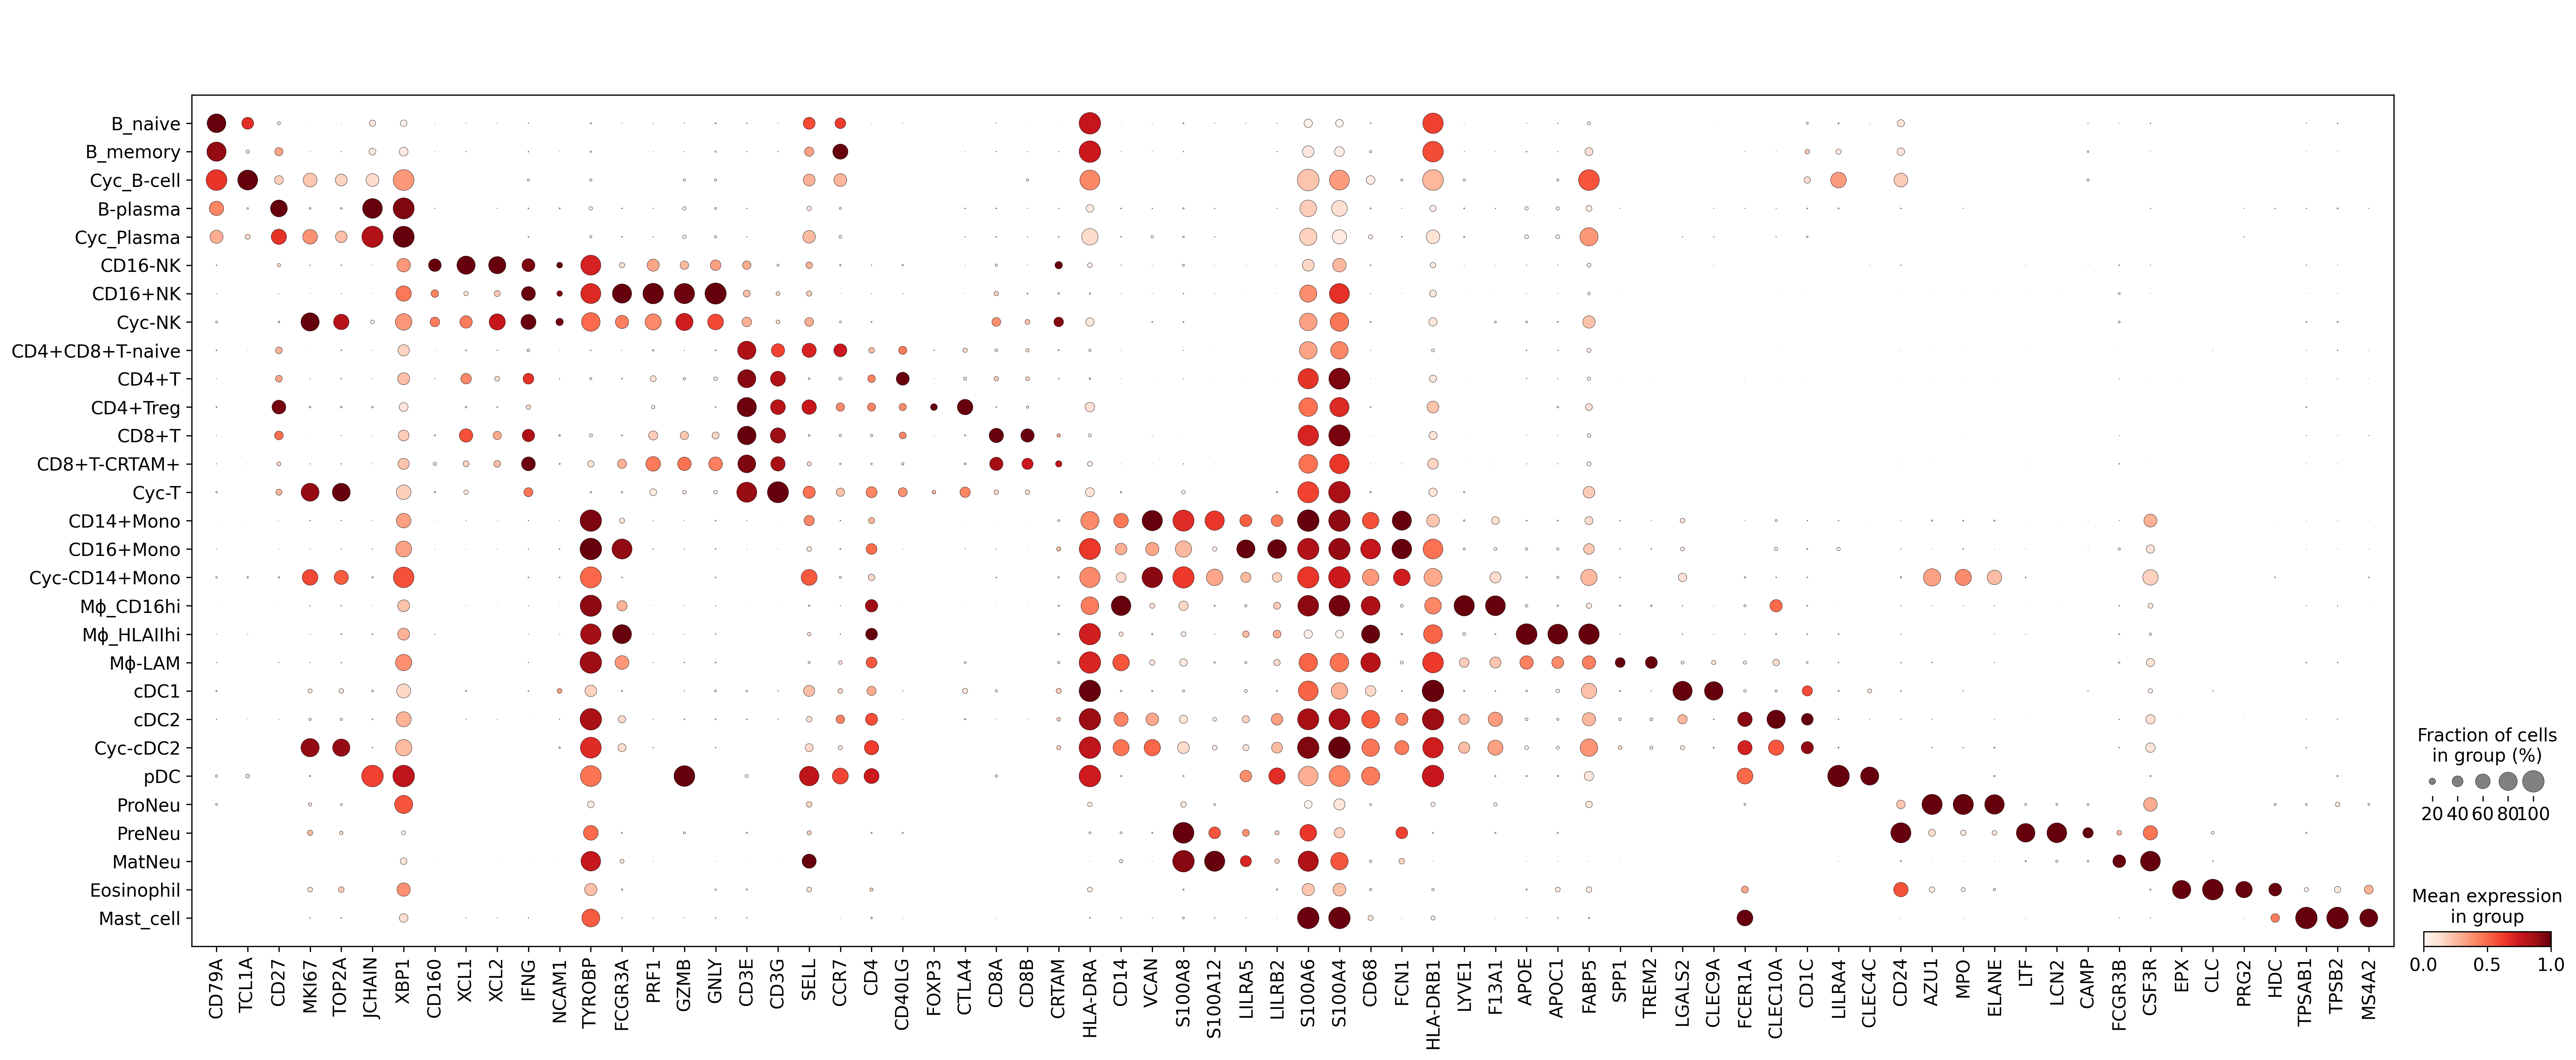

In [49]:
sc.pl.dotplot(adata,['CD79A','TCL1A','CD27','MKI67','TOP2A','JCHAIN','XBP1','CD160','XCL1','XCL2','IFNG','NCAM1','TYROBP','FCGR3A','PRF1','GZMB','GNLY','CD3E','CD3G','SELL','CCR7','CD4','CD40LG','FOXP3','CTLA4','CD8A','CD8B','CRTAM','HLA-DRA','CD14','VCAN','S100A8','S100A12','LILRA5','LILRB2','S100A6','S100A4','CD68','FCN1','HLA-DRB1','LYVE1','F13A1','APOE','APOC1','FABP5','SPP1','TREM2','LGALS2','CLEC9A','FCER1A','CLEC10A','CD1C','LILRA4','CLEC4C','CD24','AZU1','MPO','ELANE','LTF','LCN2','CAMP','FCGR3B','CSF3R','EPX','CLC','PRG2','HDC','TPSAB1','TPSB2','MS4A2'],
              groupby='annotation_fin',categories_order=['B_naive','B_memory','Cyc_B-cell','B-plasma','Cyc_Plasma','CD16-NK','CD16+NK','Cyc-NK','CD4+CD8+T-naive','CD4+T','CD4+Treg','CD8+T','CD8+T-CRTAM+','Cyc-T','CD14+Mono','CD16+Mono','Cyc-CD14+Mono','Mϕ_CD16hi','Mϕ_HLAIIhi','Mϕ-LAM','cDC1','cDC2','Cyc-cDC2','pDC','ProNeu','PreNeu','MatNeu','Eosinophil','Mast_cell'],
             save='ICM_Immune_cell_scvi_mark1.pdf',standard_scale='var')